In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-data-simple-linear-regression/Salary_Data.csv


## Data Pre-Processing

### Loading Dataset

In [2]:
dataset = pd.read_csv('/kaggle/input/salary-data-simple-linear-regression/Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
# Dividing the dataset according to the independent & dependent variables
X = dataset.iloc[:,0].values
X = np.reshape(X,newshape=(-1,1))
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [4]:
y = dataset.iloc[:,1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

### Splitting the Dataset to train & test

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

In [6]:
print(X_train, X_test, y_train, y_test,sep="\n" + "-"*10 + '\n')

[[ 9.5]
 [ 2. ]
 [ 8.7]
 [ 7.9]
 [ 8.2]
 [ 2.2]
 [ 1.5]
 [ 9. ]
 [ 3. ]
 [ 5.9]
 [ 4.1]
 [ 3.2]
 [ 9.6]
 [ 1.3]
 [ 5.1]
 [ 1.1]
 [ 4.9]
 [10.5]
 [10.3]
 [ 3.7]
 [ 3.2]
 [ 4. ]
 [ 4. ]
 [ 2.9]]
----------
[[5.3]
 [7.1]
 [3.9]
 [6. ]
 [4.5]
 [6.8]]
----------
[116969.  43525. 109431. 101302. 113812.  39891.  37731. 105582.  60150.
  81363.  57081.  54445. 112635.  46205.  66029.  39343.  67938. 121872.
 122391.  57189.  64445.  56957.  55794.  56642.]
----------
[83088. 98273. 63218. 93940. 61111. 91738.]


### Training the Model

In [7]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [8]:
print('Coef: ',regressor.coef_)
print('Intercept: ',regressor.intercept_)

Coef:  [9332.94473799]
Intercept:  25609.89799835482


### Predicting the Results on Test Data

In [9]:
y_pred = regressor.predict(X_test)

### Visualizing the Results over Test data

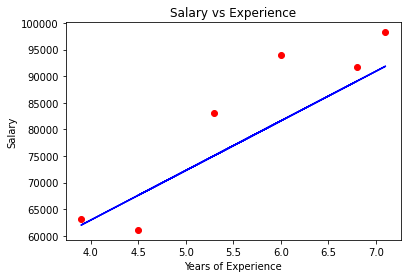

In [10]:
import matplotlib.pyplot as plt

plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_pred,'b-')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

### Testing the model on some random data

In [11]:
# Question: How much salary can a person can get if he has 16 years of experience?
pred_salary = regressor.predict([[16]])
print("Predicted Salary: ", round(pred_salary[0]))

Predicted Salary:  174937
